<a href="https://colab.research.google.com/github/pallavikailas/pap-smear-for-cancer/blob/main/notebook/visualise_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository from GitHub
!git clone https://github.com/pallavikailas/pap-smear-for-cancer.git /content/project_root

Cloning into '/content/project_root'...
remote: Enumerating objects: 1065, done.
remote: Counting objects: 100% (1065/1065), done.
remote: Compressing objects: 100% (1042/1042), done.
remote: Total 1065 (delta 47), reused 656 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (1065/1065), 40.48 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
# Install necessary dependencies (if you have a requirements.txt file)
!pip install -r /content/project_root/requirements.txt

In [3]:
# Adjust Python import path
import sys
sys.path.append('/content/project_root/src')  # Add the src directory to the path

In [4]:
# Import the get_data function from dataloader.py
from data_loader import get_data

# Load training data
x, y = get_data("/content/project_root/data/train")

In [5]:
# Check if data is loaded correctly
print(f"Features shape: {x.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (643, 350)
Labels shape: (643,)


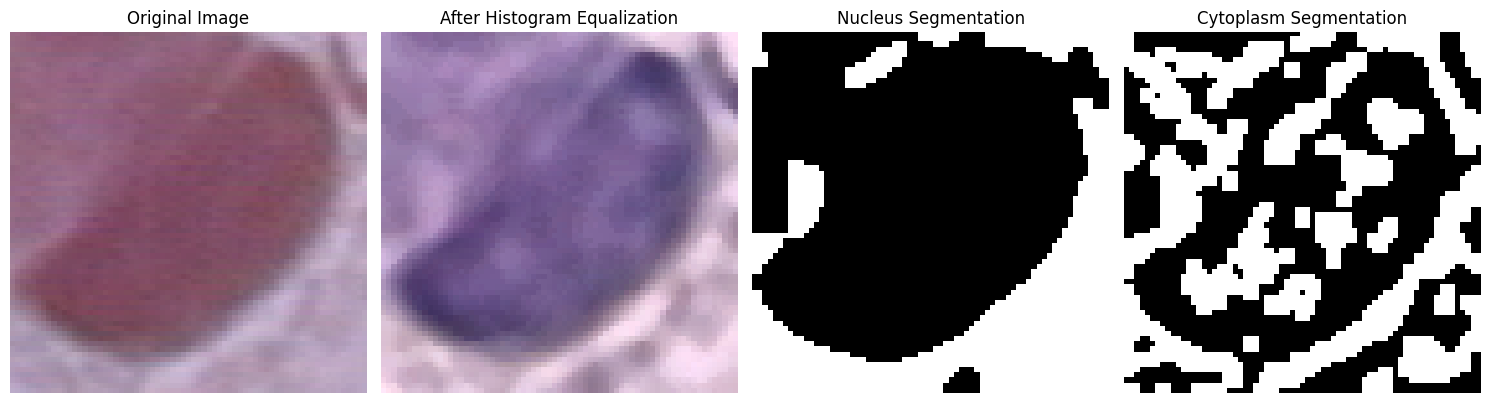

In [7]:
from feature_extraction import analyze_pap_smear, visualize_results
import cv2

# Path to an example image
image_path = "/content/project_root/data/train/carcinoma_in_situ/149143370-149143378-001.BMP"

# Analyze and visualize
features_normalized, img_eq, nucleus_mask, cytoplasm_mask = analyze_pap_smear(image_path)
visualize_results(cv2.imread(image_path), img_eq, nucleus_mask, cytoplasm_mask)

In [8]:
from train import train_random_forest, train_knn, train_svm
from sklearn.model_selection import train_test_split

# Split data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Train models
rf_model = train_random_forest(x_train, y_train)
knn_model = train_knn(x_train, y_train)
svm_model = train_svm(x_train, y_train)

In [10]:
from evaluate import evaluate_model

# Evaluate each model
print("Random Forest:")
evaluate_model(rf_model, x_val, y_val)

print("KNN:")
evaluate_model(knn_model, x_val, y_val)

print("SVM:")
evaluate_model(svm_model, x_val, y_val)

Random Forest:
Accuracy: 66.67%
Classification Report:
                      precision    recall  f1-score   support

  carcinoma_in_situ       0.63      0.86      0.73        14
   light_dysplastic       0.80      0.57      0.67        35
moderate_dysplastic       0.42      0.53      0.47        15
    normal_columnar       1.00      0.59      0.74        22
normal_intermediate       0.88      0.78      0.82         9
 normal_superficiel       0.88      1.00      0.93         7
  severe_dysplastic       0.51      0.70      0.59        27

           accuracy                           0.67       129
          macro avg       0.73      0.72      0.71       129
       weighted avg       0.72      0.67      0.67       129

KNN:
Accuracy: 52.71%
Classification Report:
                      precision    recall  f1-score   support

  carcinoma_in_situ       0.25      0.36      0.29        14
   light_dysplastic       0.72      0.60      0.66        35
moderate_dysplastic       0.26      0.53

In [11]:
from ensemble import evaluate_ensemble

# Evaluate ensemble model
evaluate_ensemble([rf_model, knn_model, svm_model], x_val, y_val)

Ensemble Accuracy: 0.00%


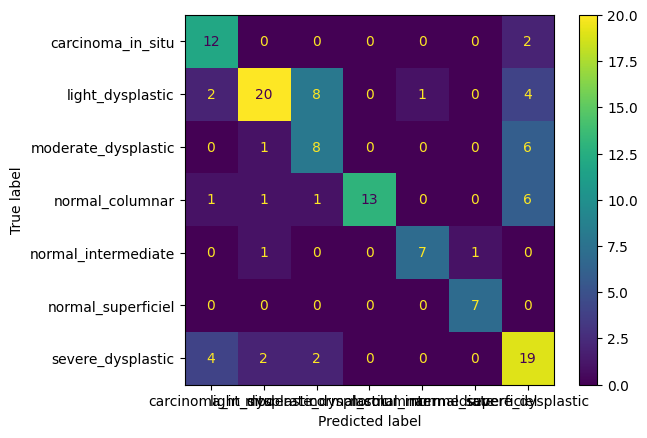

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, x_val, y_val)
plt.show()